In [3]:
# Load libraries
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [4]:
df_election=pd.read_csv('merged_train.csv')

# contructing this for storing output which we have to store later
df_output = df_election[['State','County']]

# Preprocessing the data.
# Converting percentages into the actual numbers, So that data get scaled according to its actual value which will help in
# getting more accurate model.
df_election['Percent White, not Hispanic or Latino'] = (df_election['Percent White, not Hispanic or Latino']/100)*(df_election['Total Population'])
df_election['Percent Black, not Hispanic or Latino'] = (df_election['Percent Black, not Hispanic or Latino']/100)*(df_election['Total Population'])
df_election['Percent Hispanic or Latino'] = (df_election['Percent Hispanic or Latino']/100)*(df_election['Total Population'])
df_election['Percent Foreign Born'] = (df_election['Percent Foreign Born']/100)*(df_election['Total Population'])
df_election['Percent Female'] = (df_election['Percent Female']/100)*(df_election['Total Population'])
df_election['Percent Age 29 and Under'] = (df_election['Percent Age 29 and Under']/100)*(df_election['Total Population'])
df_election['Percent Age 65 and Older'] = (df_election['Percent Age 65 and Older']/100)*(df_election['Total Population'])
df_election['Percent Unemployed'] = (df_election['Percent Unemployed']/100)*(df_election['Total Population'])
df_election['Percent Less than High School Degree'] = (df_election['Percent Less than High School Degree']/100)*(df_election['Total Population'])
df_election['Percent Less than Bachelor\'s Degree'] = (df_election['Percent Less than Bachelor\'s Degree']/100)*(df_election['Total Population'])
df_election['Percent Rural'] = (df_election['Percent Rural']/100)*(df_election['Total Population'])

# Selecting predictor variables from dataframe i.e. removing Democratic, Republic and Party columns from input dataframe.
x = df_election.iloc[:,0:16]

# taking target variable i.e. votes Democratic party got into separate dataframe.
# so that no need to split data again as we will train two separate model one for democratic and another for 
# republican vote count.
y = df_election[['Democratic','Republican', 'Party']]

In [5]:
#splitting data into test and training with 75 percent of data as training data 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25)

In [6]:
# Standardizing the training set and the test set both using train set parameters only.

scaler = StandardScaler()

#taking numerical columns only for scale consideration.
scaler.fit(x_train[['Total Population',
       'Percent White, not Hispanic or Latino',
       'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
       'Percent Foreign Born', 'Percent Female', 'Percent Age 29 and Under',
       'Percent Age 65 and Older', 'Median Household Income',
       'Percent Unemployed', 'Percent Less than High School Degree',
       'Percent Less than Bachelor\'s Degree', 'Percent Rural']])

x_train_scaled = scaler.transform(x_train[['Total Population',
       'Percent White, not Hispanic or Latino',
       'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
       'Percent Foreign Born', 'Percent Female', 'Percent Age 29 and Under',
       'Percent Age 65 and Older', 'Median Household Income',
       'Percent Unemployed', 'Percent Less than High School Degree',
       'Percent Less than Bachelor\'s Degree', 'Percent Rural']])

# creating dataframe from scaled variables.
x_train_scaled = pd.DataFrame(x_train_scaled, columns = ['Total Population',
       'Percent White, not Hispanic or Latino',
       'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
       'Percent Foreign Born', 'Percent Female', 'Percent Age 29 and Under',
       'Percent Age 65 and Older', 'Median Household Income',
       'Percent Unemployed', 'Percent Less than High School Degree',
       'Percent Less than Bachelor\'s Degree', 'Percent Rural'])

x_test_scaled = scaler.transform(x_test[['Total Population',
       'Percent White, not Hispanic or Latino',
       'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
       'Percent Foreign Born', 'Percent Female', 'Percent Age 29 and Under',
       'Percent Age 65 and Older', 'Median Household Income',
       'Percent Unemployed', 'Percent Less than High School Degree',
       'Percent Less than Bachelor\'s Degree', 'Percent Rural']])

x_test_scaled = pd.DataFrame(x_test_scaled, columns = ['Total Population',
       'Percent White, not Hispanic or Latino',
       'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
       'Percent Foreign Born', 'Percent Female', 'Percent Age 29 and Under',
       'Percent Age 65 and Older', 'Median Household Income',
       'Percent Unemployed', 'Percent Less than High School Degree',
       'Percent Less than Bachelor\'s Degree', 'Percent Rural'])

# creating this for construction the resultant output i.e. for Problem 7
x_complete_scaled =  scaler.transform(x[['Total Population',
       'Percent White, not Hispanic or Latino',
       'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
       'Percent Foreign Born', 'Percent Female', 'Percent Age 29 and Under',
       'Percent Age 65 and Older', 'Median Household Income',
       'Percent Unemployed', 'Percent Less than High School Degree',
       'Percent Less than Bachelor\'s Degree', 'Percent Rural']])

x_complete_scaled = pd.DataFrame(x_complete_scaled, columns = ['Total Population',
       'Percent White, not Hispanic or Latino',
       'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
       'Percent Foreign Born', 'Percent Female', 'Percent Age 29 and Under',
       'Percent Age 65 and Older', 'Median Household Income',
       'Percent Unemployed', 'Percent Less than High School Degree',
       'Percent Less than Bachelor\'s Degree', 'Percent Rural'])



In [5]:
#Creating model to predict the votes *democratic party* will get in a county on the basis of following columns
#1. 'Percent Less than High School Degree',
#2. 'Percent Female',
#3. 'Percent White, not Hispanic or Latino',
#4. 'Total Population',
#5. 'Percent Less than Bachelor\'s Degree',
#6. 'Percent Black, not Hispanic or Latino'
# we have choosen these columns as after adding them adjusted R value was increasing significantly.

model = linear_model.LinearRegression()
fitted_model_demo_votes = model.fit(x_train_scaled.loc[:,['Percent Less than High School Degree','Percent Female','Percent White, not Hispanic or Latino','Total Population','Percent Less than Bachelor\'s Degree','Percent Black, not Hispanic or Latino']],y_train['Democratic'])
print('Model Coefficient of democratic:',fitted_model_demo_votes.coef_)
y_pred_demo = fitted_model_demo_votes.predict(x_test_scaled.loc[:,['Percent Less than High School Degree','Percent Female','Percent White, not Hispanic or Latino','Total Population','Percent Less than Bachelor\'s Degree','Percent Black, not Hispanic or Latino']])

#calculating Adjusted R_Square Value of a model as we have multiple predictor variables so we can't use R Square as its value always
# increase with the increase in predictor variable count.

corr_coef = numpy.corrcoef(y_test['Democratic'],y_pred_demo)[1, 0]
R_squared = corr_coef**2
print('R_squared:',R_squared)
adjusted_r_square = 1-(((1-R_squared)*(x_test.shape[0]-1))/(x_test.shape[0]-6-1))
print('adjusted_r_square :',adjusted_r_square)

Model Coefficient of democratic: [-18080.38097062  47901.52395536    246.95837079  93506.75358445
 -70663.7087881    6077.5766806 ]
R_squared: 0.9215749172353773
adjusted_r_square : 0.9199634429319947


In [6]:
# Creating regression model to predict the number of votes *republic party* will get in each county
# we have identified these four predictor variables as adding them into the model has increased the adjusted r square

#Predictor Variables are : 
#1 'Percent Less than High School Degree',
#2 'Total Population',
#3 'Percent Less than Bachelor\'s Degree',
#4 'Percent Black, not Hispanic or Latino'

model_republic = linear_model.LinearRegression()

fitted_model_republic_votes = model_republic.fit(x_train_scaled.loc[:,['Percent Less than High School Degree','Total Population','Percent Less than Bachelor\'s Degree','Percent Black, not Hispanic or Latino']],y_train['Republican'])
print('Model Coefficient of Republican:',fitted_model_republic_votes.coef_)
y_pred_rep = fitted_model_republic_votes.predict(x_test_scaled.loc[:,['Percent Less than High School Degree','Total Population','Percent Less than Bachelor\'s Degree','Percent Black, not Hispanic or Latino']])

#calculating Adjusted R_Square Value of a model as we have multiple predictor variables so we can't use R Square as its value always
# increase with the increase in predictor variable count.

corr_coef = numpy.corrcoef(y_test['Republican'],y_pred_rep)[1, 0]
R_squared = corr_coef**2
print(R_squared)
adjusted_r_square = 1-(((1-R_squared)*(x_test.shape[0]-1))/(x_test.shape[0]-4-1))
print(adjusted_r_square)

Model Coefficient of Republican: [-35962.30160325  24003.51724434  50316.22779541 -10156.5244453 ]
0.9234168113125101
0.922374863167102


[0.7424749163879598, 0.2575250836120402, array([0.76666667, 0.6440678 ]), array([0.89756098, 0.40425532]), array([0.82696629, 0.49673203])]


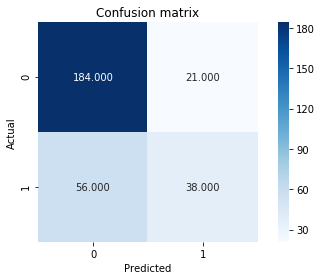

In [8]:
#k-nearest neighbors 
classifier = KNeighborsClassifier(n_neighbors = 5)  
classifier.fit(x_train_scaled.loc[:,['Percent Age 29 and Under','Percent Age 65 and Older']], y_train['Party']) 

y_pred = classifier.predict(x_test_scaled.loc[:,['Percent Age 29 and Under','Percent Age 65 and Older']])
      
conf_matrix = metrics.confusion_matrix(y_test['Party'], y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

accuracy = metrics.accuracy_score(y_test['Party'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test['Party'], y_pred, average = None)
recall = metrics.recall_score(y_test['Party'], y_pred, average = None)
F1_score = metrics.f1_score(y_test['Party'], y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.7591973244147158, 0.24080267558528423, array([0.75675676, 0.775     ]), array([0.95609756, 0.32978723]), array([0.84482759, 0.46268657])]


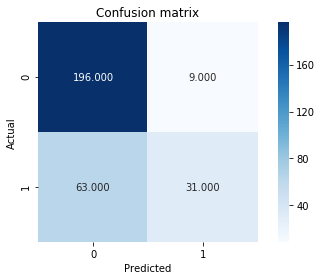

In [9]:
#naive bayes
naive_classifier = GaussianNB()  
naive_classifier.fit(x_train_scaled.loc[:,['Percent Foreign Born','Percent Hispanic or Latino',
                                     'Percent White, not Hispanic or Latino',
                                     'Percent Black, not Hispanic or Latino']], y_train['Party']) 

y_pred = naive_classifier.predict(x_test_scaled.loc[:,['Percent Foreign Born',
                                                 'Percent Hispanic or Latino',
                                                 'Percent White, not Hispanic or Latino',
                                                 'Percent Black, not Hispanic or Latino']])

conf_matrix = metrics.confusion_matrix(y_test['Party'], y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

accuracy = metrics.accuracy_score(y_test['Party'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test['Party'], y_pred, average = None)
recall = metrics.recall_score(y_test['Party'], y_pred, average = None)
F1_score = metrics.f1_score(y_test['Party'], y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])


[0.725752508361204, 0.274247491638796, array([0.78604651, 0.57142857]), array([0.82439024, 0.5106383 ]), array([0.8047619 , 0.53932584])]


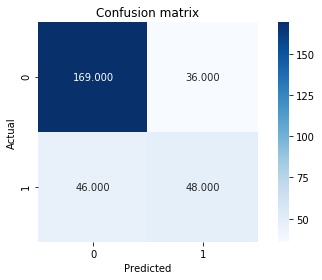

In [11]:
# DecisionTreeClassifier 
#(This is preferred classifier as most of the time when we run this we get more correct prediction for democtratic counties )

decision_classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)

decision_classifier.fit(x_train_scaled.loc[:,['Percent Less than High School Degree','Total Population',
                                     'Percent Less than Bachelor\'s Degree','Percent Female',
                                    'Percent White, not Hispanic or Latino',
                                     'Percent Black, not Hispanic or Latino','Percent Age 29 and Under']],y_train['Party'])
y_pred = decision_classifier.predict(x_test_scaled.loc[:,['Percent Less than High School Degree','Total Population',
                                     'Percent Less than Bachelor\'s Degree','Percent Female',
                                        'Percent White, not Hispanic or Latino',
                                     'Percent Black, not Hispanic or Latino','Percent Age 29 and Under']])
conf_matrix = metrics.confusion_matrix(y_test['Party'], y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

accuracy = metrics.accuracy_score(y_test['Party'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test['Party'], y_pred, average = None)
recall = metrics.recall_score(y_test['Party'], y_pred, average = None)
F1_score = metrics.f1_score(y_test['Party'], y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

In [12]:
#Build a clustering model to cluster the counties. Consider at least two different
#clustering techniques with multiple combinations of parameters and multiple
#combinations of variables. Compute unsupervised and supervised evaluation metrics
#for the validation set with the party of the counties (Democratic or Republican) as the
#true cluster and report your results. What is the best performing clustering model? What
#is the performance of the model? How did you select the parameters of model? How did
#you select the variables of the model?

# Partition the dataset into attributes and true clusters (Democratic/Republican)
# Consider only the following attributes: 
# 1)'Percent Black, not Hispanic or Latino'
# 2)'Percent Age 29 and Under'
# 3)'Percent Female'

[0.11698138507276129, 0.9023462743671391]


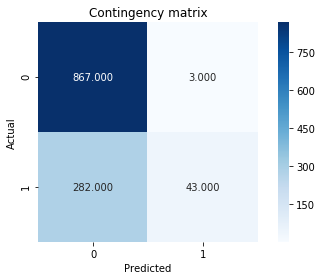

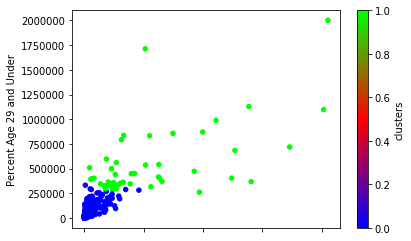

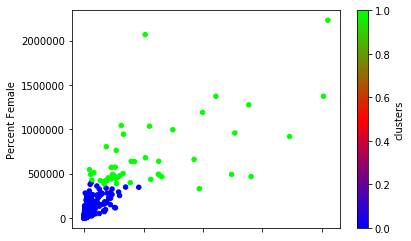

In [13]:
# Cluster the dataset using K-Means clustering
X = df_election[['Percent Black, not Hispanic or Latino',  'Percent Age 29 and Under','Percent Female']]
Y = df_election['Party']

# Standardize the attributes
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state = 0).fit(X)
clusters = clustering.labels_

# Plot contingency matrix and compute evaluation metrics for K-Means clustering.
cont_matrix = metrics.cluster.contingency_matrix(df_election['Party'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(df_election['Party'], clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

# Plot clusters found using K-Means clustering
df_election['clusters'] = clusters
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Age 29 and Under', c = 'clusters', colormap = plt.cm.brg)
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Female', c = 'clusters', colormap = plt.cm.brg)

[0.03369805816713174, 0.9334416208536676]


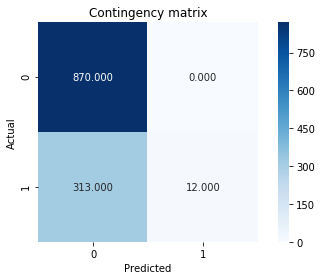

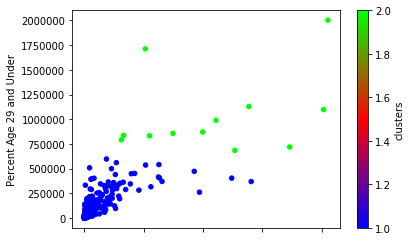

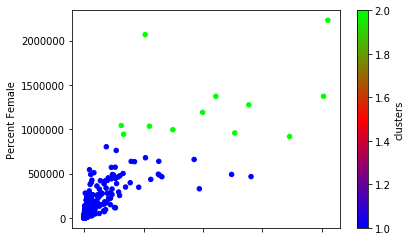

In [14]:
# Cluster the dataset using hierarchical clustering with complete linkage method
X = df_election[['Percent Black, not Hispanic or Latino',  'Percent Age 29 and Under','Percent Female']]
Y = df_election['Party']

# Standardize the attributes
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

clustering = linkage(X, method = "complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

# Plot contingency matrix and compute evaluation metrics for hierarchical clustering with complete linkage method.
df_election['clusters'] = clusters - 1
cont_matrix = metrics.cluster.contingency_matrix(df_election['Party'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(df_election['Party'], clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

# Plot clusters found using hierarchical clustering with single linkage method
df_election['clusters'] = clusters
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Age 29 and Under', c = 'clusters', colormap = plt.cm.brg)
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Female', c = 'clusters', colormap = plt.cm.brg)


[0.005608925119335567, 0.9534951623508129]


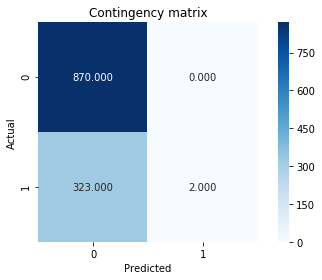

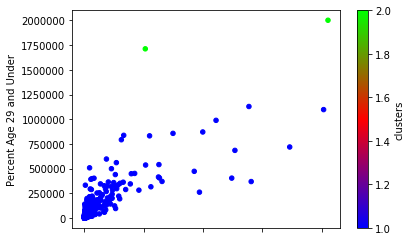

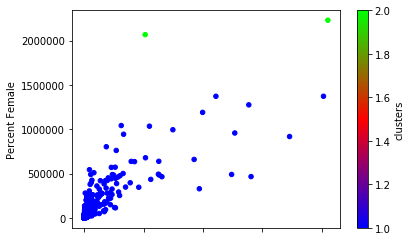

In [15]:
# Cluster the dataset using hierarchical clustering with single linkage method
# Partition the dataset into attributes and true clusters (Democratic/Republican)
# Consider only the following attributes: 
# 'Percent Black, not Hispanic or Latino', 'Percent Age 29 and Under', 'Percent Female'
X = df_election[['Percent Black, not Hispanic or Latino',  'Percent Age 29 and Under','Percent Female']]
Y = df_election['Party']

# Standardize the attributes
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


# Cluster the dataset using hierarchical clustering with single linkage method
clustering = linkage(X, method = "single", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

# Plot contingency matrix and compute evaluation metrics for hierarchical clustering with single linkage method.
df_election['clusters'] = clusters - 1
cont_matrix = metrics.cluster.contingency_matrix(df_election['Party'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(df_election['Party'], clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

# Plot clusters found using hierarchical clustering with single linkage method
df_election['clusters'] = clusters
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Age 29 and Under', c = 'clusters', colormap = plt.cm.brg)
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Female', c = 'clusters', colormap = plt.cm.brg)

0.42504715177668634


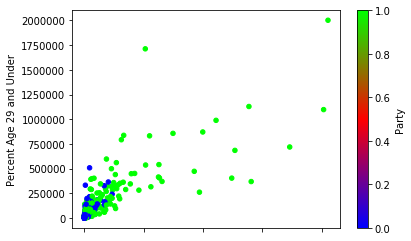

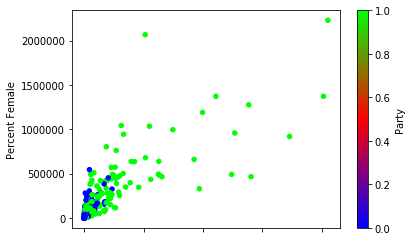

In [16]:
# Which of the clustering techniques had the best performance? ...
# Compute evaluation metrics for the true clusters of the data (Democratic/Republican).

# Partition the dataset into attributes and true clusters (Democratic/Republican)
# Consider only the following attributes: 
# 'Percent Black, not Hispanic or Latino', 'Percent Age 29 and Under', 'Percent Female'
X = df_election[['Percent Black, not Hispanic or Latino',  'Percent Age 29 and Under','Percent Female']]
Y = df_election['Party']

# Standardize the attributes
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

silhouette_coefficient = metrics.silhouette_score(X, df_election['Party'], metric = "euclidean")
print(silhouette_coefficient)

# Plot true clusters (churned/non-churned)
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Age 29 and Under', c = 'Party', colormap = plt.cm.brg)
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Female', c = 'Party', colormap = plt.cm.brg)

In [17]:
# Problem 5 Part 6
# Partition the dataset into attributes and true clusters (Democratic/Republican)
# Consider only the following attributes: 
# 1)'Percent Less than High School Degree',
# 2) 'Total Population',
# 3) 'Percent Less than Bachelor\'s Degree',
# 4) 'Percent Black, not Hispanic or Latino'

[0.12125092562845344, 0.9000653486640373]


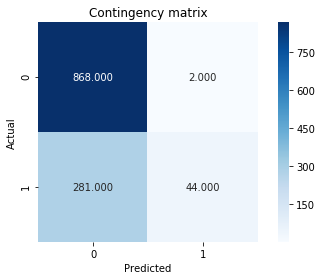

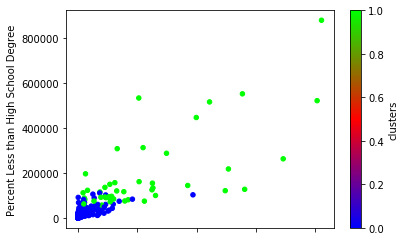

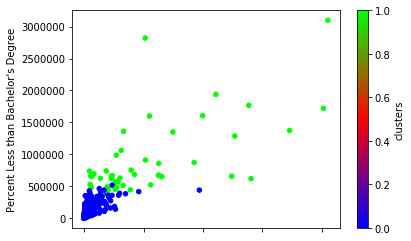

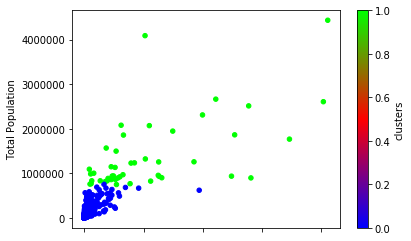

In [18]:
# checking K-Means clustering and its performance.
#(This is preferred over other clustering algorithm as it able to predict more demcratic counties together in a single cluster)

X = df_election[['Percent Less than High School Degree', 'Total Population',
                 'Percent Less than Bachelor\'s Degree', 'Percent Black, not Hispanic or Latino']]
Y = df_election['Party']

# Standardize the attributes
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Cluster the dataset using K-Means clustering
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state = 0).fit(X)
clusters = clustering.labels_

# Plot contingency matrix and compute evaluation metrics for K-Means clustering.
cont_matrix = metrics.cluster.contingency_matrix(df_election['Party'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(df_election['Party'], clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

# Plot clusters found using K-Means clustering
df_election['clusters'] = clusters
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Less than High School Degree', c = 'clusters', colormap = plt.cm.brg)
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Less than Bachelor\'s Degree', c = 'clusters', colormap = plt.cm.brg)
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Total Population', c = 'clusters', colormap = plt.cm.brg)


[1.0, 0.9335748917531748]


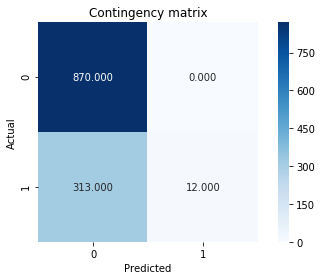

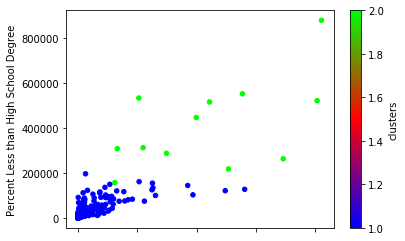

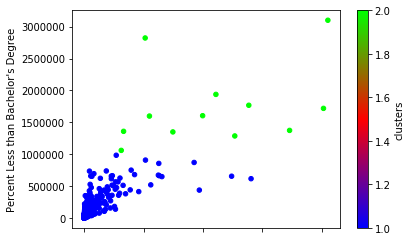

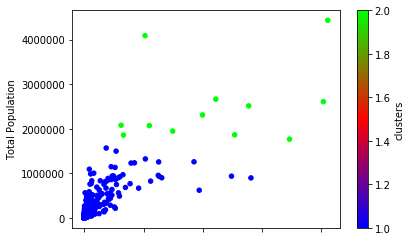

In [19]:

# Checking out hierarchical clustering with complete linkage method and its performance.
X = df_election[['Percent Less than High School Degree', 'Total Population',
                 'Percent Less than Bachelor\'s Degree', 'Percent Black, not Hispanic or Latino']]
Y = df_election['Party']

# Standardize the attributes
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Cluster the dataset using hierarchical clustering with complete linkage method
clustering = linkage(X, method = "complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

# Plot contingency matrix and compute evaluation metrics for hierarchical clustering with complete linkage method.
df_election['clusters'] = clusters - 1
cont_matrix = metrics.cluster.contingency_matrix(df_election['Party'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(clusters, df_election['clusters'])
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

# Plot clusters found using hierarchical clustering with single linkage method
df_election['clusters'] = clusters
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Less than High School Degree', c = 'clusters', colormap = plt.cm.brg)
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Less than Bachelor\'s Degree', c = 'clusters', colormap = plt.cm.brg)
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Total Population', c = 'clusters', colormap = plt.cm.brg)


[0.005608925119335567, 0.9533653283261857]


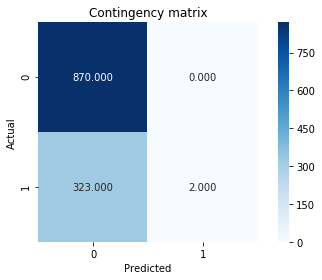

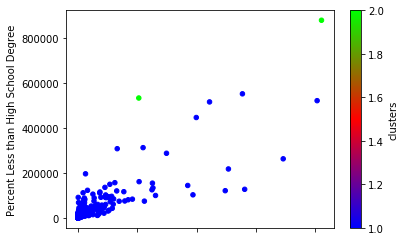

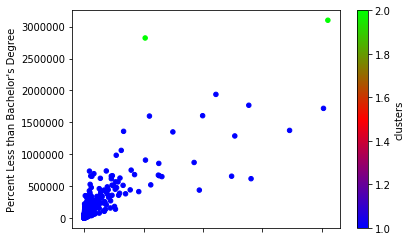

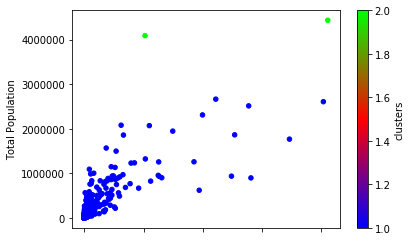

In [20]:

# Checking out hierarchical clustering with single linkage method and its performance
X = df_election[['Percent Less than High School Degree', 'Total Population',
                 'Percent Less than Bachelor\'s Degree', 'Percent Black, not Hispanic or Latino']]
Y = df_election['Party']

# Standardize the attributes
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Cluster the dataset using hierarchical clustering with single linkage method
clustering = linkage(X, method = "single", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

# Plot contingency matrix and compute evaluation metrics for hierarchical clustering with single linkage method.
df_election['clusters'] = clusters - 1
cont_matrix = metrics.cluster.contingency_matrix(df_election['Party'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(df_election['Party'], clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

# Plot clusters found using hierarchical clustering with single linkage method
df_election['clusters'] = clusters
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Less than High School Degree', c = 'clusters', colormap = plt.cm.brg)
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Less than Bachelor\'s Degree', c = 'clusters', colormap = plt.cm.brg)
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Total Population', c = 'clusters', colormap = plt.cm.brg)


0.4163992312537243


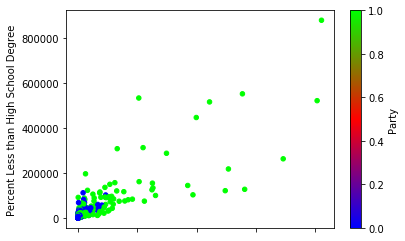

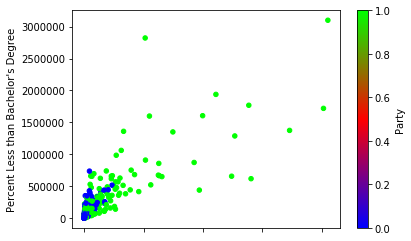

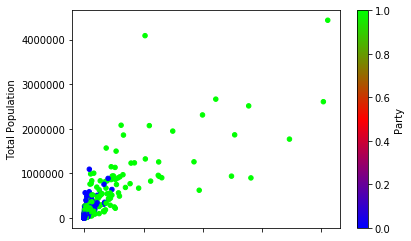

In [21]:
# This shows how the true graphs looks like i.e. made using actual party column.

X = df_election[['Percent Less than High School Degree', 'Total Population',
                 'Percent Less than Bachelor\'s Degree', 'Percent Black, not Hispanic or Latino']]
Y = df_election['Party']

# Standardize the attributes
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Which of the clustering techniques had the best performance? ...
# Compute evaluation metrics for the true clusters of the data (Democratic/Republican).
silhouette_coefficient = metrics.silhouette_score(X, df_election['Party'], metric = "euclidean")
print(silhouette_coefficient)

# Plot true clusters (churned/non-churned)
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Less than High School Degree', c = 'Party', colormap = plt.cm.brg)
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Less than Bachelor\'s Degree', c = 'Party', colormap = plt.cm.brg)
ax = df_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Total Population', c = 'Party', colormap = plt.cm.brg)


In [ ]:

#Adding predicted votes by democratic and republic model into output data frame

#Predicting democratic votes using model we have built in problem 3 I
y_pred_demo_votes = fitted_model_demo_votes.predict(x_complete_scaled.loc[:,['Percent Less than High School Degree','Percent Female','Percent White, not Hispanic or Latino','Total Population','Percent Less than Bachelor\'s Degree','Percent Black, not Hispanic or Latino']])

#Predicting Repblican votes using model we have built in problem 3 II
y_pred_republic_votes = fitted_model_republic_votes.predict(x_complete_scaled.loc[:,['Percent Less than High School Degree','Total Population','Percent Less than Bachelor\'s Degree','Percent Black, not Hispanic or Latino']])

#Predicting Party using classifier we have built in problem 4 i.e. decision tree classifier
pred_party = decision_classifier.predict(x_complete_scaled.loc[:, ['Percent Less than High School Degree','Total Population',
                                     'Percent Less than Bachelor\'s Degree','Percent Female',
                                    'Percent White, not Hispanic or Latino',
                                     'Percent Black, not Hispanic or Latino','Percent Age 29 and Under']]).tolist()

df_output['Democratic'] = y_pred_demo_votes
df_output['Republican'] = y_pred_republic_votes
df_output['Party'] = pred_party



df_output.to_csv("output.csv",index=False)
